5) Data Analytics II
1. Implement logistic regression using Python/R to perform classification on
Social_Network_Ads.csv dataset.
2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall
on the given dataset.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [3]:
oData = pd.read_csv('Social_Network_Ads.csv')

In [5]:
oData.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
oData.isnull().sum()

,0
User ID,0
Gender,0
Age,0
EstimatedSalary,0
Purchased,0


In [7]:
oData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [8]:
# Convert the gender in int form
oData['Gender'] = oData['Gender'].apply(lambda x: 1 if x == 'Male' else 0)

In [9]:
oData['Gender'].head()

,Gender
0,1
1,1
2,0
3,0
4,1


In [10]:
oData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   User ID          400 non-null    int64
 1   Gender           400 non-null    int64
 2   Age              400 non-null    int64
 3   EstimatedSalary  400 non-null    int64
 4   Purchased        400 non-null    int64
dtypes: int64(5)
memory usage: 15.8 KB


In [11]:
oData.describe()

,User ID,Gender,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000,400.000000
mean,1.569154e+07,0.490000,37.655000,69742.500000,0.357500
std,7.165832e+04,0.500526,10.482877,34096.960282,0.479864
min,1.556669e+07,0.000000,18.000000,15000.000000,0.000000
25%,1.562676e+07,0.000000,29.750000,43000.000000,0.000000
50%,1.569434e+07,0.000000,37.000000,70000.000000,0.000000
75%,1.575036e+07,1.000000,46.000000,88000.000000,1.000000
max,1.581524e+07,1.000000,60.000000,150000.000000,1.000000


In [12]:
oData = oData.drop('User ID', axis=1)

In [13]:
oData

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


In [14]:
oData.corr()

,Gender,Age,EstimatedSalary,Purchased
Gender,1.000000,-0.073741,-0.060435,-0.042469
Age,-0.073741,1.000000,0.155238,0.622454
EstimatedSalary,-0.060435,0.155238,1.000000,0.362083
Purchased,-0.042469,0.622454,0.362083,1.000000


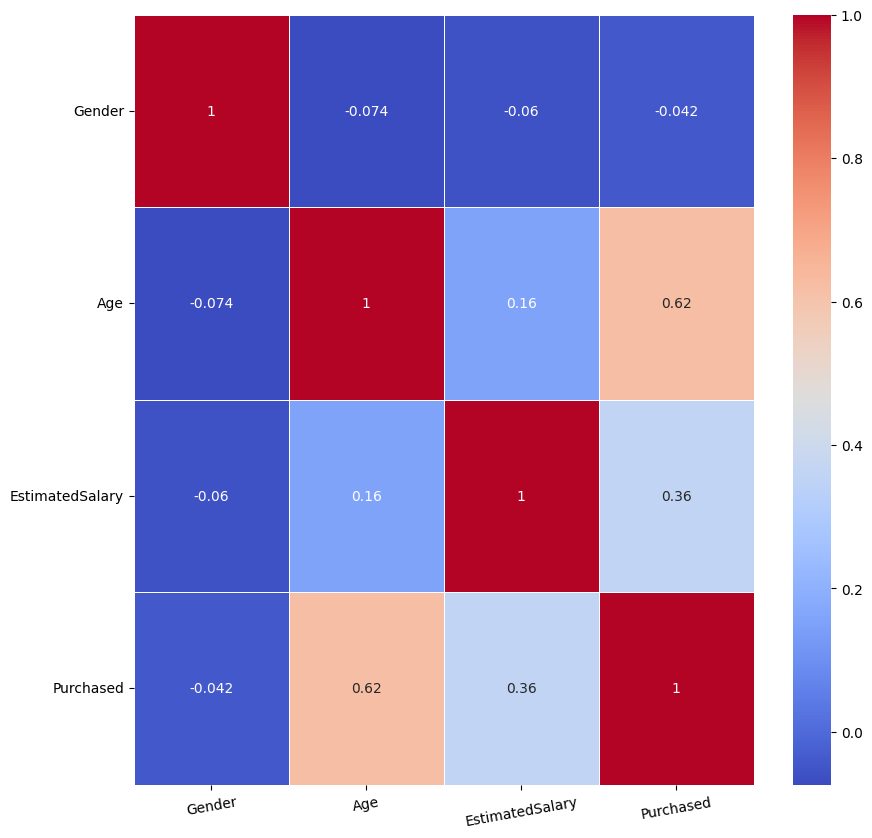

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(oData.corr(), annot=True, cmap='coolwarm',linewidths=0.5)
plt.xticks(rotation=10)
plt.yticks(rotation=0)
plt.show()

In [17]:
x = oData[['Age','EstimatedSalary']]
y = oData['Purchased']

In [19]:
print("Shape Of x: ",x.shape)
print("Shape Of y: ",y.shape)

Shape Of x:  (400, 2)
Shape Of y:  (400,)


In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [28]:
print("x_train : ",x_train.shape)
print("x_test : ",x_test.shape)
print("y_train : ",y_train.shape)
print("y_test : ",x_test.shape)

x_train :  (300, 2)
x_test :  (100, 2)
y_train :  (300,)
y_test :  (100, 2)


In [29]:
standardScalerXTrain = StandardScaler()
x_train = standardScalerXTrain.fit_transform(x_train)
standardScalerX_test = StandardScaler()
x_test = standardScalerX_test.fit_transform(x_test)

In [31]:
oLogesticRegressionModel = LogisticRegression()
oLogesticRegressionModel.fit(x_train, y_train)

LogisticRegression()

In [32]:
oLogesticRegressionModel.score(x_train, y_train)

0.8366666666666667

In [33]:
y_pred = oLogesticRegressionModel.predict(x_test)

In [34]:
print("y_pred Data :- ",y_pred)

y_pred Data :-  [0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0
 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0]


In [36]:
print("y_test Data :- ",y_test.values)

y_test Data :-  [0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 1 0 0
 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0
 1 0 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 0 0 0 0 0 1 0 1 1]


In [40]:
print("Accuracy Score :- ",accuracy_score(y_test, y_pred)*100,"%")

Accuracy Score :-  86.0 %


In [44]:
y_prob = oLogesticRegressionModel.predict_proba(x_test)[:, 1]


In [47]:
confusion_matrix = confusion_matrix(y_test,y_pred)

In [48]:
print("TP:",confusion_matrix[0,0])
print("FP:",confusion_matrix[0,1])
print("TN:",confusion_matrix[1,1])
print("FN:",confusion_matrix[1,0])

TP: 61
FP: 2
TN: 25
FN: 12


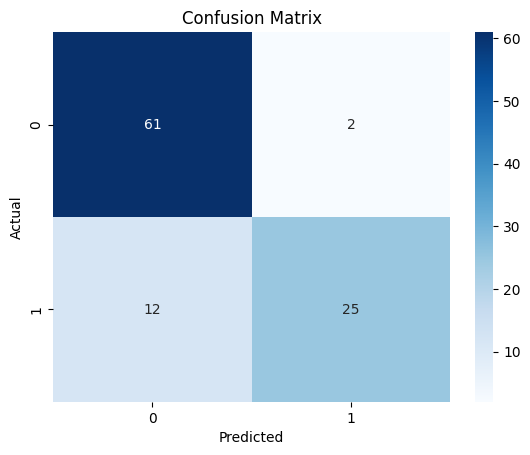

In [49]:
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [53]:
print("Precision Score :- ",precision_score(y_test, y_pred)*100,"%")
print("Recall Score :- ",recall_score(y_test, y_pred)*100,"%")

Precision Score :-  92.5925925925926 %
Recall Score :-  67.56756756756756 %
